In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
%run ./main.py
import matplotlib.pyplot as plt

# Started at Mon, 13 Jul 2020 16:33:03 +0900 JST
# ===========================
# Python version:  3.7.0 (default, Jun 28 2018, 13:15:42)  [GCC 7.2.0]
# API version:  1013
# Platform:  linux
# ===========================
# Elapse time for preparation:  0.0001690387725830078  [sec]
# Preparaiton is done
# ===========================
# Ended at Mon, 13 Jul 2020 16:33:03 +0900 JST


<Figure size 432x288 with 0 Axes>

In [8]:
who

A	 Atomfield	 Atomfluence	 Atomtime	 Atomvolume	 E	 F2f	 Hartree	 Make_fields	 
PC	 aB	 cckt	 ch	 chbar	 ct	 dcckt	 dcckt2cckt	 ec	 
eckt	 ekt2thetakt	 ev	 evkt	 f2F	 fpi	 get_J	 get_dcckt	 get_kpAt	 
halfepsc	 k2ec	 k2ev	 k2vc	 k2vv	 kpAt	 math	 np	 parameter_class	 
pi	 plt	 print_endtime	 print_footer	 print_header	 print_midtime	 sol	 sys	 t	 
te	 thetackt	 thetavkt	 time	 tpi	 ts	 tt	 vc	 vv	 
zI	 


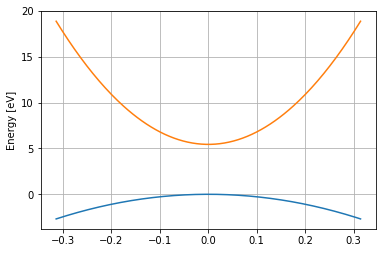

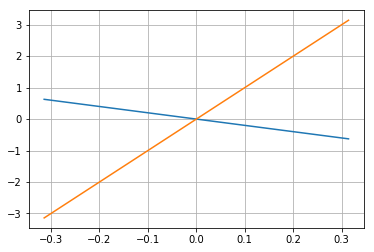

In [13]:
PC = parameter_class()
PC.Nk = 200
PC.Make_kspace()
ev = k2ev(PC,PC.k)
ec = k2ec(PC,PC.k)
plt.figure()
plt.ylabel('Energy [eV]')
plt.plot(PC.k,ev*Hartree)
plt.plot(PC.k,ec*Hartree)
plt.grid()
plt.show()
#
vv = k2vv(PC,PC.k)
vc = k2vc(PC,PC.k)
plt.figure()
plt.plot(PC.k,vv)
plt.plot(PC.k,vc)
plt.grid()
plt.show()


(200, 100000)


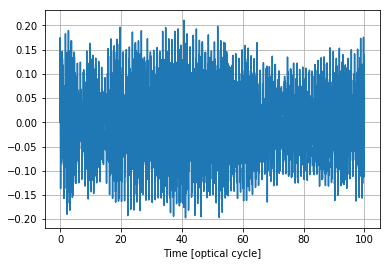

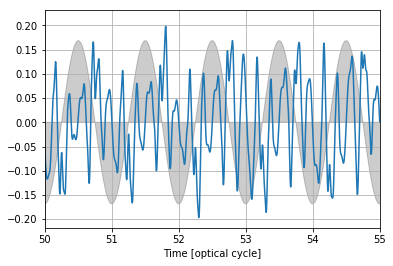

In [46]:
PC.Nt = 100000
PC.Ncycle = 100
t, A, E= Make_fields(PC)
kpAt = get_kpAt(PC,A)
evkt = k2ev(PC,kpAt)
eckt = k2ec(PC,kpAt)
print(evkt.shape)
#
thetavkt = ekt2thetakt(PC, t, evkt)
thetackt = ekt2thetakt(PC, t, eckt)
#
dcckt = get_dcckt(PC, thetavkt, thetackt, evkt, eckt, E)
cckt = dcckt2cckt(PC, t, dcckt)
#
J = get_J(PC, cckt,thetavkt,thetackt)
plt.figure()
plt.xlabel('Time [optical cycle]')
plt.plot(t*PC.omegac/tpi,J)
plt.grid()
plt.show()
#
plt.figure()
plt.xlim(PC.Ncycle/2, PC.Ncycle/2+5.0)
plt.xlabel('Time [optical cycle]')
plt.plot(t*PC.omegac/tpi,J)
plt.fill_between(t*PC.omegac/tpi,E/np.amax(E)*0.8*np.amax(J),0.0*E,color='k',alpha=0.2)
plt.grid()
plt.show()

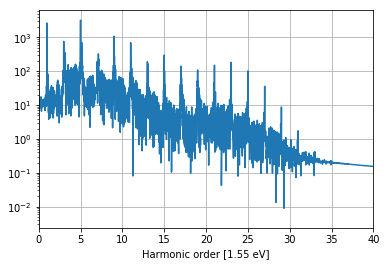

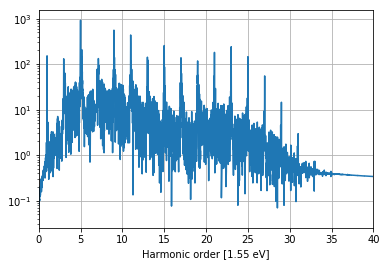

In [48]:
dt = t[1] - t[0]
omega = np.fft.fftfreq(PC.Nt)*(tpi/dt)
JF = np.fft.fft(J)
plt.figure()
plt.xlim(0.0,40.0)
plt.xlabel('Harmonic order [1.55 eV]')
plt.yscale('log')
plt.plot(omega[:PC.Nt//2]/PC.omegac,np.abs(JF[:PC.Nt//2]))
plt.grid()
plt.show()
a = F2f(t,J)
aF = np.fft.fft(a)
plt.xlim(0.0,40.0)
plt.xlabel('Harmonic order [1.55 eV]')
plt.yscale('log')
plt.plot(omega[:PC.Nt//2]/PC.omegac,np.abs(aF[:PC.Nt//2]))
plt.grid()
plt.show()

